<a href="https://colab.research.google.com/github/Bogdan-Wiederspan/cnn_notebooks/blob/main/Tutorial_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# History
Machine learning is a topic that is researched for quite a long time. Biggest problem in the past was the lack of computational ressources. Especially image recognition was terrible in this department, since the analyzation of pictures needed huge feed-forward-networks (bad scaling of parameter numbers). 

Feed-forward-networks are a bad choice to analyze images, since the learned mapping is not translation or rotation-invariant. This means, that the network could not recognize for example a deer, when the deer was slightly tildet or not centered.

LeNet-5 was one of the earliest convolutional neural networks and promoted the development of deep learning. The main benefit of convolutional networks is their invariance in translation and rotation due to the usage of kernel-stride. The other benefit of this approach is that the kernel window provides a local information source. was the reduction of learnable parameters by introduction of convultions

We will recreate the LeNet-5 network to train a model on MNIST dataset!

In [1]:
# imports
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
import matplotlib.pyplot as plt

def print_all_datasets():
  """
  Tensorflow has plenty of datasets to play with
  a list can be printed with this command
  """
  for dataset in tfds.list_builders():
    print(dataset)
    


# The dataset
Lets first load the MNIST dataset into our memory by utilising the ```tensorflow_datasets.load('mnist')``` function. 

This functions does many more things in the background. The dataset is pre-split loaded and the ```split``` argument describes what part of the split should be returned ("train", "valid", "test"). 

The keyword argument ```as_supervised``` says the function to also return the labels of the dataset. The return value is a tuple of the form: (value, label).

The last interesting keyword argument in this function is ```batch_size=-1```.
The loaded dataset contains many samples of data. Settings this keyword to -1 loads the whole dataset into the RAM. 

**A word of warning:** This is something one does not normally want. The main reason are again computational boundaries: like having not enough RAM. The dataset we use today is actually quiet small so this is not a problem. In your everyday life you would use the batch argument to sample a subset, a batch, of the data.

In [2]:
# load the data pre-splitted with the labels 
(train_image, train_label_ints), (test_image, test_label) = tfds.load(name='mnist' , 
                                                                 split=['train', 'test'], 
                                                                 shuffle_files=True, 
                                                                 as_supervised=True, 
                                                                 batch_size=-1, 
                                                                 data_dir = '/dataset/')

# one-hot-encoding ensures that the categories are vectors and not plain ints
# depth: number of categories 
train_label = tf.one_hot(
            indices = train_label_ints,
            depth = 10
)

# Lets see our one hot encoded vector
print(train_label)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /dataset/mnist/3.0.1. Subsequent calls will reuse this data.
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 10), dtype=float32)


# Checkout the dataset
The first step of every person handling data is plotting the data to get a feeling of its statistical distribution. A handy command to do so is the ```shape``` of the data.

In [3]:
print(f' traindata shape: {train_image.shape}\n testdata shape: {test_image.shape}')

 traindata shape: (60000, 28, 28, 1)
 testdata shape: (10000, 28, 28, 1)


The first argument of the data shape is the number of samples. MNIST training set has 60000 images, while the test has only 10000 images.

The last three arguments of the shape are the pixel values of the images.
The dataformat to stores these pixel values is a numpy array or tensor (which is a numpy array that can also live on a GPU).

This means the second argument in the shape are the number of pixel values of a column. The third argument describes the number of pixels of a row. Both are 28, so the image is a square (conv-nets will always work on square pictures, of the downside of using them). The last argument is image specific and describes the color-channel. A value of 1 means that we have gray-scaled images.

Lets plot the dataset to see some samples:

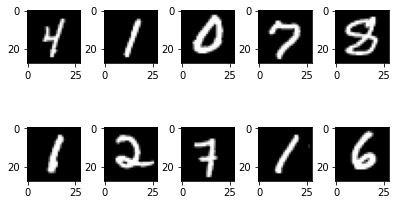

In [4]:
fig, ax = plt.subplots(2,5)

for ax, image in zip(ax.flatten(), train_image[0:10,:,:,0]):
  # the last index (channel) needs to be 0 for gray-scaled images
  ax.imshow(image,cmap='gray')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
plt.show()

What kind of data does the MNIST dataset consist of ?

- square pictures
- hand drawn numbers going from 0 to 9 
- gray scaled numbers

MNIST was the dataset used by Yann LeCun (todays director of AI at Facebook) to test the very first convolutional neural networkLeNet, .

We want to recreate this network and get a better feeling about Keras modelbuilding. The blueprint are depicted in the script, but for convenience reason here they are: 
![An image](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/1920px-Comparison_image_neural_networks.svg.png)

We see LeNet to the left and the much more advanced network AlexNet on the right. Its quiet interesting how similar, but yet so different they are. 
AlexNet is much more advanced than the plain old LeNet. 

Could you think of some reasons why:
- they swapped all sigmoid functions out
- the swapped the Pooling from average to max?
- they use now 3 conv-layers with small window size insted of one with bigger kernel size





In general Conv-networks can be separated into 2 blocks: The conv-part (filters) and the feed-forward-network (classficator) at the end. In the convolutional-part of the network filters are trained to detect different propeties. They workout the different features of the image. These processed information are then used as input of a feed-forward to classify the input.

# Build LeNet with Keras:
Lets build the model. Our starting point is a ```tf.keras.models.Sequential()```object. A sequential object is a linear container holding the networks layer and have some handy functions defined to pass inputs through the layers.

You can add a simply by using ```model.add(keras_layer)```

A list of possible keras_layer can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/layers. 

By looking at the Picture of LeNet we need a ***Dense Layer, a Pooling Layer*** and atleast somekind of ***ConvND*** layer (which Dimension? Remember your input data shape!). 

These networks have many arguments like stride or padding, or kernel size.
You find an explanation to all arguments in the script.

The most frustating part of setting up CNNs is a shape missmatch.
This happens quiet often, since each layer is capable of reducing the output size. Use the formular given in the script about the output shape of the network!


Hint:
``` padding``` can be "same" or "valid". valid is the default and means no pading is added. Meanwhile with same a padding with 0 is done.

```stride``` describes the number fields that the kernel move (stride).
The + 1 in the formular is the bias!




To help you a little in building the network the start and end is already given. Compare the code of the layer with the Image of LeNet to get a better understand what they do!

Try to answer the following questions while learning the coding:
- what happens with the output if padding is "same" and stride is 1 (default)
- how does the output shape changes by using a PoolingLayer with poolsize (2,2)
- why do we flatten the output 
- what is the shape after flatten?
- what work is done by the dense network
- why do we use a softmax activation function at the end?
- which value has the sum of the softmax function output?

In [6]:
"#@title" 
# alias to make it shorter to access the layers
import tensorflow as tf
model = tf.keras.models.Sequential()

layers = tf.keras.layers

model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid', input_shape=(28,28,1), padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))

model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid', padding="valid"))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='sigmoid'))

model.add(layers.Dense(units=84, activation='sigmoid'))

model.add(layers.Dense(units=10, activation = 'softmax'))


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              


# Training:
Okay we got our model. Now we need to assemble the model with an optimizer. To start the trainings process run the ```model.fit()``` command. Adjust the Hyperparameters before doing so.


In [7]:
print(train_image.shape,train_label.shape)


(60000, 28, 28, 1) (60000, 10)


In [9]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", "categorical_crossentropy"])


batch_size=128
epoch=2
shuffele=True
subset = 128

train_history = model.fit(train_image[0:subset],
                          train_label[0:subset],
                          batch_size=batch_size,
                          epochs=epoch,
                          verbose=True,
                          shuffle=True)

Epoch 1/2
1/1 [==============================] - 1s 756ms/step - loss: 2.5543 - accuracy: 0.0625 - categorical_crossentropy: 2.5543
Epoch 2/2
1/1 [==============================] - 0s 68ms/step - loss: 2.4598 - accuracy: 0.0625 - categorical_crossentropy: 2.4598


In [8]:
# use the model to predict an input
test_subset = 10

test_image_subset = test_image[0:test_subset]
test_label_subset = test_label[0:test_subset]

# predicts 10 classes, class with highest probability is our best pick
prediction = model.predict(test_image_subset)

# this gives us the index of the biggest prediction value
# since our numbers are ordered from 0 to 9 these
# are also our prediction values
mapped_prediction = tf.math.argmax(prediction,1)



for pred, true in zip(mapped_prediction, test_label_subset):
  print(f'Prediction: {pred}, True: {true}, Guessed right: {pred == true}')


Prediction: 5, True: 2, Guessed right: False
Prediction: 5, True: 0, Guessed right: False
Prediction: 5, True: 4, Guessed right: False
Prediction: 5, True: 8, Guessed right: False
Prediction: 5, True: 7, Guessed right: False
Prediction: 5, True: 6, Guessed right: False
Prediction: 5, True: 0, Guessed right: False
Prediction: 5, True: 6, Guessed right: False
Prediction: 5, True: 3, Guessed right: False
Prediction: 5, True: 1, Guessed right: False


How can one improve the networks scores? Play a little bit with the hyperparameters. Increase the trainings epoch, hidden layer, number of layer.... 